<a href="https://colab.research.google.com/github/eldellobo/22E3/blob/main/Estadistica/Colab/ACA2/ACA_No_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




<center> <h2>Realizar analísis bivariado en correspondencia a R de una muestra significativa del 10% de la base Lista de Colegios Media 2018</h2> </center>
<br>
<br>
<br>
<center>
<p>Presentado por:</p><br>


<p>Luis Miguel Arias Rodrigues</p>
<p>14467436</p><br>



<p>Presentado a:</p><br>

<p>Ing. Milton Hernando Buitrago Torres</p><br>



<p>Especialización en Analítica de Datos, ESP11</p><br>

<p>Corporación Unificada Nacional de Educación Superior, CUN</p><br>
<p>Septiembre 28, 2022 </p><br>
</center>






---




<center> <h3>Correlación lineal&nbsp;&nbsp;   R&nbsp;&nbsp;  -&nbsp;&nbsp;  Lista de Colegios Media 2018</h3></center>



*   Muestra aleatoria ordenada de mayor a menor
*   Relaciones bivariadas
    *   Simple con respecto a Primaria
    *   Simple con respecto a Secundaria    
    *   Simple con respecto a Media
*   Graficos de dispersión y resultado de la R


---











<center><h3>Formulas a utilizar en el analísis</h3></center>

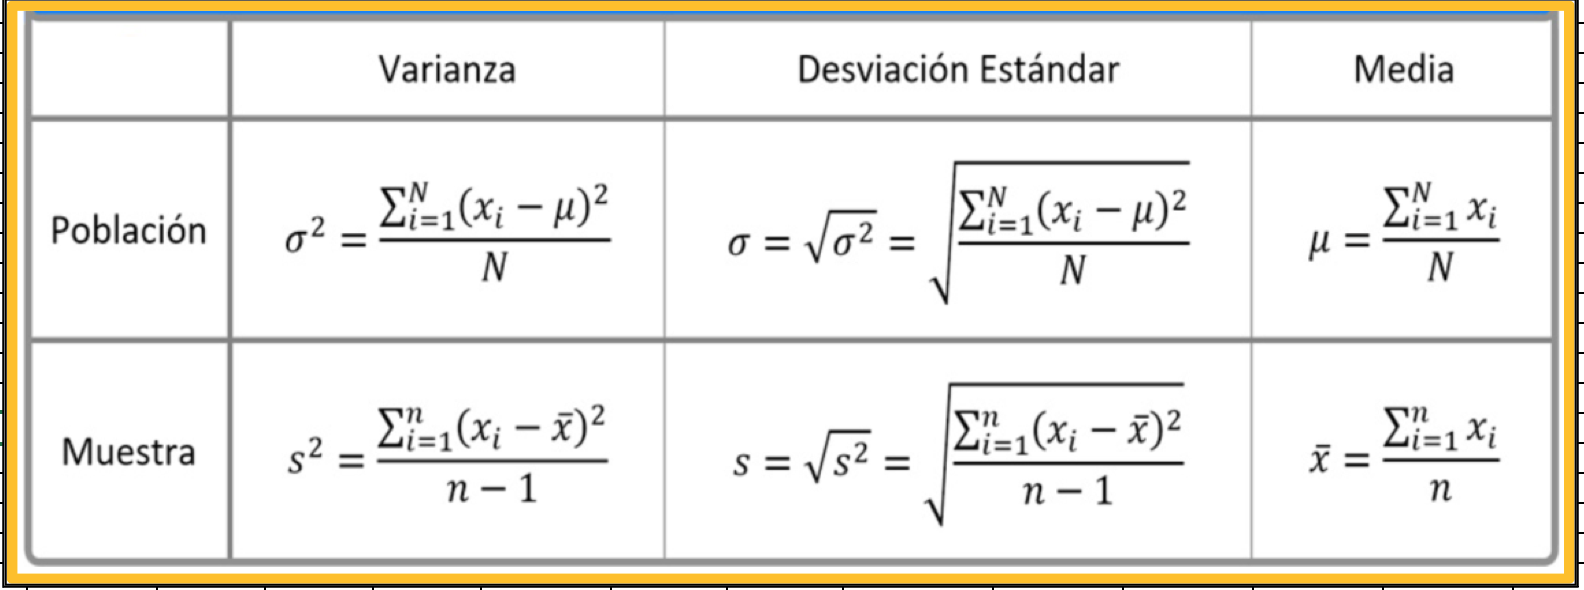

In [1]:
from IPython.display import Image

Image(filename = "/content/drive/MyDrive/CUN-Estadistica/ACA2/Formulas.png", width=800, height=400)

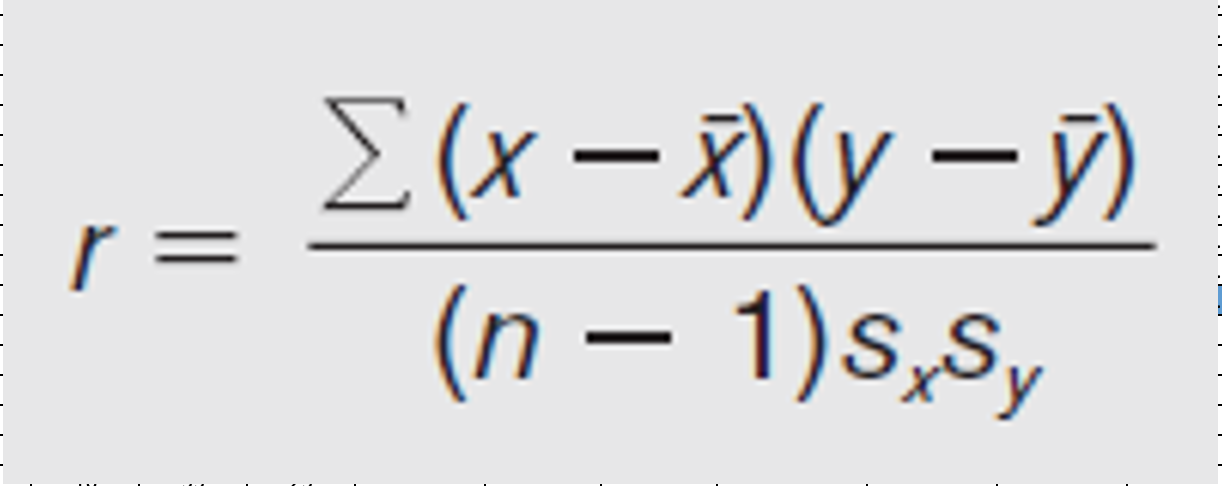

In [2]:
Image(filename = "/content/drive/MyDrive/CUN-Estadistica/ACA2/R.png", width=600, height=300)



---



<center><h2>Inicio Codigo</h2></center>

In [3]:
# Cargo las librerias necesarias
#--------------------------------------------------------------
# Manejo de Datos
import pandas as pd
import numpy as np
# Generador de gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
# Procesamiento y análisis
import statsmodels.api as sm
import math
from scipy import stats
from scipy.stats import pearsonr
# Configuracion para matplotlib
plt.style.use('ggplot')
#Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Cargo la sabana de datos
sabana = pd.read_excel('/content/drive/MyDrive/CUN-Estadistica/ACA2/Lista_de_Colegios_Media_2018.xlsx')

In [5]:
# Valido las variables de la sabana
sabana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PUESTO      5000 non-null   int64  
 1   COLEGIO     5000 non-null   object 
 2   MUNICIPIO   5000 non-null   object 
 3   PRIMARIA    5000 non-null   float64
 4   SECUNDARIA  5000 non-null   float64
 5   MEDIA       5000 non-null   float64
 6   SIMPLE      5000 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 273.6+ KB


In [6]:
# Convierto en dataframe

lcm = pd.DataFrame(sabana)

<center><h2>Tomo la  muestra significativa del 10%</h2></center>


---


<center><h4>Método Utilizado <br> Muestreo aleatorio simple</h4></center>
<p>
El muestreo aleatorio simple es un procedimiento de muestreo probabilístico que da a cada elemento de la población objetivo y a cada posible muestra de un tamaño determinado, la misma probabilidad de ser seleccionado.

Este sistema funciona a través de un método de «sorteo» entre un universo de individuos, en el que se le asigna a cada integrante un número para ser escogido.

Dicho procedimiento garantiza que todos los elementos muestrales tengan la misma probabilidad de ser seleccionados para formar parte de la muestra
</p>

[fuente](https://deepnote.com/@a_mas/Funciones-de-Muestreo-en-Python-5e3efaeb-d12c-472c-96b7-bb34e377b3e7)


In [7]:
# Realizo el muestreo
lcm1 = lcm.sample(frac = .10, random_state=1)

In [8]:
# Valido que el muestreo sea del 10% del dataframe
lcm1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 2764 to 2048
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PUESTO      500 non-null    int64  
 1   COLEGIO     500 non-null    object 
 2   MUNICIPIO   500 non-null    object 
 3   PRIMARIA    500 non-null    float64
 4   SECUNDARIA  500 non-null    float64
 5   MEDIA       500 non-null    float64
 6   SIMPLE      500 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 31.2+ KB


In [9]:
# Creo un nuevo dataframe con las variables a analizar
lcm1N = lcm1[['PRIMARIA','SECUNDARIA','MEDIA','SIMPLE']]

In [10]:
# Valido el muestreo del 10% del nuevo dataframe
lcm1N.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 2764 to 2048
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PRIMARIA    500 non-null    float64
 1   SECUNDARIA  500 non-null    float64
 2   MEDIA       500 non-null    float64
 3   SIMPLE      500 non-null    float64
dtypes: float64(4)
memory usage: 19.5 KB


In [11]:
# Exploro antes de ordenar
lcm1N.head(5)

,PRIMARIA,SECUNDARIA,MEDIA,SIMPLE
2764,5.88,7.26,7.47,6.870
4767,6.88,5.93,5.09,5.967
3814,4.09,3.94,7.15,5.060
3499,6.89,5.87,7.31,6.690
2735,5.47,5.74,7.48,6.230


<center>Muestra aleatoria 10% ordenada de mayor a menor</center>

In [12]:
# Ordeno de Mayor a Menor
lcm1N.sort_values(by=['PRIMARIA'], inplace=True, ascending=False)
lcm1N.sort_values(by=['SECUNDARIA'], inplace=True, ascending=False)
lcm1N.sort_values(by=['MEDIA'], inplace=True, ascending=False)
lcm1N.sort_values(by=['SIMPLE'], inplace=True, ascending=False)

In [13]:
# Exploro despues de ordenar
lcm1N.head(5)

,PRIMARIA,SECUNDARIA,MEDIA,SIMPLE
79,8.77,8.70,9.16,8.877
5,8.54,8.56,9.45,8.850
21,8.07,8.70,9.35,8.707
62,8.40,8.38,9.20,8.660
57,8.32,8.40,9.22,8.647


<center><h2>Tablas de frecuencia por cada variable y sus medidas</h2></center>

In [14]:
# Creo un dataframe por cada variable para crear la tabla de fecuencia
pri = lcm1N[['PRIMARIA']]
sec = lcm1N[['SECUNDARIA']]
med = lcm1N[['MEDIA']]
sim = lcm1N[['SIMPLE']]

In [15]:
m = pri.size # Numero de datos
k = round(1 + 3.322 * math.log10(m)) # Numero de intervalos
ak = 4 # Intervalos del aca2
vMx = pri.max() # Valor Maximo
vMn = pri.min() # Valor Mimo
inf = pri.min() # Limite inferior del primer intervalo
rang = round(vMx - vMn) # Rango(R)
amp = round(rang / k) # Amplitud
dif = (pri.min() - pri.max()) % k
f = math.ceil(rang / k) # Frecuencia
sup = vMx + f  # Limite superior

In [16]:
# Creo la tabla de frecuencias para la variable 
intervalos_pri = pd.interval_range( start = vMn[0], end = sup[0], freq = f,  name="Intervalo", closed="left")

df_pri = pd.DataFrame(index=intervalos_pri)
df_pri["LimInf"] = df_pri.index.left
df_pri["LimSup"] = df_pri.index.right
df_pri["Marca"]  = df_pri.index.mid
df_pri["fi"] = pd.cut(pri['PRIMARIA'] , bins= df_pri.index).value_counts()

In [17]:
sum(df_pri['fi']) # Valido los datos

500

In [18]:
# Obtengo las frecuencias absolutas acumuladas
# Saco una lista de los valores donde obtengo la FI
Fi = df_pri["fi"].values
#Recorro la lista para ir creando una nueva lista con las sumas
# y obtener la frecuencia absoluta acumulada
a = []
b = 0
for c in Fi:
  b = c + b
  a.append(b)
df_pri["Fi"] = a

In [19]:
df_pri['x.f'] = df_pri['Marca']*df_pri['fi'] # Creo x.f
sum_fi = sum(df_pri['fi']) # Suma total de fi
sum_xf = sum(df_pri['x.f']) # Suma total de x.f
media_ = sum_xf / sum_fi # Media de la variable
df_pri['(x.med'] = df_pri['Marca'] - media_ # Obtengo x.med
df_pri['(x-xmed).fi'] = df_pri['(x.med']* df_pri['fi'] # Obtengo x-med*fi
df_pri['(x-xmed)^2'] = df_pri['(x-xmed).fi']**2 # 

In [20]:
mediana_ = pri['PRIMARIA'].median() # Mediana
moda_ = pri['PRIMARIA'].mode() # Moda
var_ = pri['PRIMARIA'].var() # Varianza
ds_ = pri['PRIMARIA'].std() # Desviacion Estandar

In [21]:
medidas_pri = pd.DataFrame()
medidas_pri['Medida'] = None
medidas_pri['Valor'] = None
md = ['Numero de Datos','Valor Maximo','Valor Minimo','Rango','Intervalos', 'Amplitud','Media','Mediana','Moda','Varianza','Desviacion Estandar']
medidas_pri['Medida'] = md
medidas_pri['Valor'] = [m, vMx[0], vMn[0], rang[0], k, amp[0], media_, mediana_, moda_[0], var_, ds_]

In [22]:
# Tabla de frecuencia PRIMARIA
df_pri

,LimInf,LimSup,Marca,fi,Fi,x.f,(x.med,(x-xmed).fi,(x-xmed)^2
Intervalo,,,,,,,,,
"[1.7, 2.8428571428571425)",1.700000,2.842857,2.271429,2,2,4.542857,-4.029714,-8.059429,64.954389
"[2.8428571428571425, 3.9857142857142858)",2.842857,3.985714,3.414286,9,11,30.728571,-2.886857,-25.981714,675.049477
"[3.9857142857142858, 5.128571428571428)",3.985714,5.128571,4.557143,103,114,469.385714,-1.744000,-179.632000,32267.655424
"[5.128571428571428, 6.271428571428571)",5.128571,6.271429,5.700000,122,236,695.400000,-0.601143,-73.339429,5378.671783
"[6.271428571428571, 7.414285714285714)",6.271429,7.414286,6.842857,144,380,985.371429,0.541714,78.006857,6085.069761
"[7.414285714285714, 8.557142857142857)",7.414286,8.557143,7.985714,114,494,910.371429,1.684571,192.041143,36879.800550
"[8.557142857142857, 9.7)",8.557143,9.700000,9.128571,6,500,54.771429,2.827429,16.964571,287.796684


In [23]:
# Medidas PRIMARIA
medidas_pri

,Medida,Valor
0,Numero de Datos,500.000000
1,Valor Maximo,9.080000
2,Valor Minimo,1.700000
3,Rango,7.000000
4,Intervalos,10.000000
5,Amplitud,1.000000
6,Media,6.301143
7,Mediana,6.415000
8,Moda,6.620000
9,Varianza,1.590407


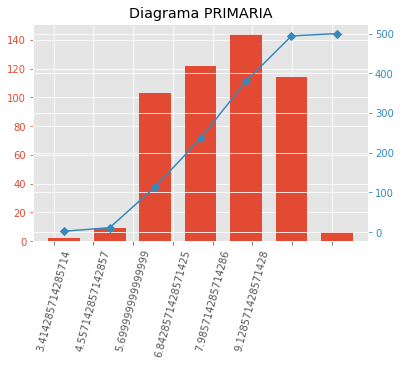

In [24]:
from matplotlib.ticker import PercentFormatter
# Utilizo un diagrama de pareto 

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('Diagrama PRIMARIA')
ax.bar(df_pri['Marca'], df_pri['fi'], color='C0')

ax2 = ax.twinx()
ax2.plot(df_pri['Marca'], df_pri['Fi'], color='C1', marker="D", ms=5)

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

ax.set_xticklabels(df_pri['Marca'],rotation=75)

plt.show()

In [25]:
m = sec.size # Numero de datos
k = round(1 + 3.322 * math.log10(m)) # Numero de intervalos
ak = 4 # Intervalos del aca2
vMx = sec.max() # Valor Maximo
vMn = sec.min() # Valor Mimo
inf = sec.min() # Limite inferior del primer intervalo
rang = round(vMx - vMn) # Rango(R)
amp = round(rang / k) # Amplitud
dif = (sec.min() - sec.max()) % k
f = math.ceil(rang / k) # Frecuencia
sup = vMx + f  # Limite superior

In [26]:
# Creo la tabla de frecuencias para la variable 
intervalos_sec = pd.interval_range( start = vMn[0], end = sup[0], freq = f,  name="Intervalo", closed="left")

df_sec = pd.DataFrame(index=intervalos_sec)
df_sec["LimInf"] = df_sec.index.left
df_sec["LimSup"] = df_sec.index.right
df_sec["Marca"]  = df_sec.index.mid
df_sec["fi"] = pd.cut(sec['SECUNDARIA'] , bins= df_sec.index).value_counts()

In [27]:
sum(df_sec['fi']) # Valido los datos

500

In [28]:
# Obtengo las frecuencias absolutas acumuladas
# Saco una lista de los valores donde obtengo la FI
Fi = df_sec["fi"].values
#Recorro la lista para ir creando una nueva lista con las sumas
# y obtener la frecuencia absoluta acumulada
a = []
b = 0
for c in Fi:
  b = c + b
  a.append(b)
df_sec["Fi"] = a

In [29]:
df_sec['x.f'] = df_sec['Marca']*df_sec['fi'] # Creo x.f
sum_fi = sum(df_sec['fi']) # Suma total de fi
sum_xf = sum(df_sec['x.f']) # Suma total de x.f
media_ = sum_xf / sum_fi # Media de la variable
df_sec['(x.med'] = df_sec['Marca'] - media_ # Obtengo x.med
df_sec['(x-xmed).fi'] = df_sec['(x.med']* df_sec['fi'] # Obtengo x-med*fi
df_sec['(x-xmed)^2'] = df_sec['(x-xmed).fi']**2 # 

In [30]:
mediana_ = sec['SECUNDARIA'].median() # Mediana
moda_ = sec['SECUNDARIA'].mode() # Moda
var_ = sec['SECUNDARIA'].var() # Varianza
ds_ = sec['SECUNDARIA'].std() # Desviacion Estandar

In [31]:
medidas_sec = pd.DataFrame()
medidas_sec['Medida'] = None
medidas_sec['Valor'] = None
md = ['Numero de Datos','Valor Maximo','Valor Minimo','Rango','Intervalos', 'Amplitud','Media','Mediana','Moda','Varianza','Desviacion Estandar']
medidas_sec['Medida'] = md
medidas_sec['Valor'] = [m, vMx[0], vMn[0], rang[0], k, amp[0], media_, mediana_, moda_[0], var_, ds_]

In [32]:
# Tabla de frecuencia SECUNDARIA
df_sec

,LimInf,LimSup,Marca,fi,Fi,x.f,(x.med,(x-xmed).fi,(x-xmed)^2
Intervalo,,,,,,,,,
"[2.25, 3.25)",2.25,3.25,2.75,3,3,8.25,-3.74,-11.22,125.8884
"[3.25, 4.25)",3.25,4.25,3.75,37,40,138.75,-2.74,-101.38,10277.9044
"[4.25, 5.25)",4.25,5.25,4.75,67,107,318.25,-1.74,-116.58,13590.8964
"[5.25, 6.25)",5.25,6.25,5.75,104,211,598.00,-0.74,-76.96,5922.8416
"[6.25, 7.25)",6.25,7.25,6.75,81,292,546.75,0.26,21.06,443.5236
"[7.25, 8.25)",7.25,8.25,7.75,185,477,1433.75,1.26,233.10,54335.6100
"[8.25, 9.25)",8.25,9.25,8.75,23,500,201.25,2.26,51.98,2701.9204


In [33]:
# Medidas SECUNDARIA
medidas_sec

,Medida,Valor
0,Numero de Datos,500.000000
1,Valor Maximo,8.810000
2,Valor Minimo,2.250000
3,Rango,7.000000
4,Intervalos,10.000000
5,Amplitud,1.000000
6,Media,6.490000
7,Mediana,6.915000
8,Moda,7.410000
9,Varianza,1.839490


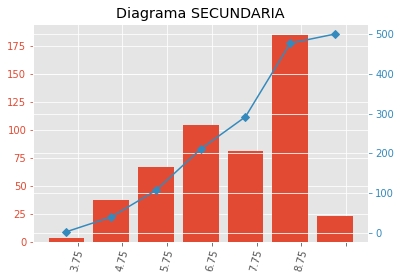

In [34]:
from matplotlib.ticker import PercentFormatter
# Utilizo un diagrama de pareto 

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('Diagrama SECUNDARIA')
ax.bar(df_sec['Marca'], df_sec['fi'], color='C0')

ax2 = ax.twinx()
ax2.plot(df_sec['Marca'], df_sec['Fi'], color='C1', marker="D", ms=5)

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

ax.set_xticklabels(df_sec['Marca'],rotation=75)

plt.show()

In [35]:
m = med.size # Numero de datos
k = round(1 + 3.322 * math.log10(m)) # Numero de intervalos
ak = 4 # Intervalos del aca2
vMx = med.max() # Valor Maximo
vMn = med.min() # Valor Mimo
inf = med.min() # Limite inferior del primer intervalo
rang = round(vMx - vMn) # Rango(R)
amp = round(rang / k) # Amplitud
dif = (med.min() - med.max()) % k
f = math.ceil(rang / k) # Frecuencia
sup = vMx + f  # Limite superior

In [36]:
# Creo la tabla de frecuencias para la variable 
intervalos_med = pd.interval_range( start = vMn[0], end = sup[0], freq = f,  name="Intervalo", closed="left")

df_med = pd.DataFrame(index=intervalos_med)
df_med["LimInf"] = df_med.index.left
df_med["LimSup"] = df_med.index.right
df_med["Marca"]  = df_med.index.mid
df_med["fi"] = pd.cut(med['MEDIA'] , bins= df_med.index).value_counts()

In [37]:
sum(df_med['fi']) # Valido los datos

500

In [38]:
# Obtengo las frecuencias absolutas acumuladas
# Saco una lista de los valores donde obtengo la FI
Fi = df_med["fi"].values
#Recorro la lista para ir creando una nueva lista con las sumas
# y obtener la frecuencia absoluta acumulada
a = []
b = 0
for c in Fi:
  b = c + b
  a.append(b)
df_med["Fi"] = a

In [39]:
df_med['x.f'] = df_med['Marca']*df_med['fi'] # Creo x.f
sum_fi = sum(df_med['fi']) # Suma total de fi
sum_xf = sum(df_med['x.f']) # Suma total de x.f
media_ = sum_xf / sum_fi # Media de la variable
df_med['(x.med'] = df_med['Marca'] - media_ # Obtengo x.med
df_med['(x-xmed).fi'] = df_med['(x.med']* df_med['fi'] # Obtengo x-med*fi
df_med['(x-xmed)^2'] = df_med['(x-xmed).fi']**2 # 

In [40]:
mediana_ = med['MEDIA'].median() # Mediana
moda_ = med['MEDIA'].mode() # Moda
var_ = med['MEDIA'].var() # Varianza
ds_ = med['MEDIA'].std() # Desviacion Estandar

In [41]:
medidas_med = pd.DataFrame()
medidas_med['Medida'] = None
medidas_med['Valor'] = None
md = ['Numero de Datos','Valor Maximo','Valor Minimo','Rango','Intervalos', 'Amplitud','Media','Mediana','Moda','Varianza','Desviacion Estandar']
medidas_med['Medida'] = md
medidas_med['Valor'] = [m, vMx[0], vMn[0], rang[0], k, amp[0], media_, mediana_, moda_[0], var_, ds_]

In [42]:
# Tabla de frecuencia MEDIA
df_med

,LimInf,LimSup,Marca,fi,Fi,x.f,(x.med,(x-xmed).fi,(x-xmed)^2
Intervalo,,,,,,,,,
"[4.89, 5.89)",4.89,5.89,5.39,82,82,441.98,-1.816,-148.912,22174.783744
"[5.89, 6.890000000000001)",5.89,6.89,6.39,24,106,153.36,-0.816,-19.584,383.533056
"[6.890000000000001, 7.890000000000001)",6.89,7.89,7.39,310,416,2290.90,0.184,57.040,3253.561600
"[7.890000000000001, 8.89)",7.89,8.89,8.39,72,488,604.08,1.184,85.248,7267.221504
"[8.89, 9.89)",8.89,9.89,9.39,12,500,112.68,2.184,26.208,686.859264


In [43]:
# Medidas MEDIA
medidas_med

,Medida,Valor
0,Numero de Datos,500.000000
1,Valor Maximo,9.450000
2,Valor Minimo,4.890000
3,Rango,5.000000
4,Intervalos,10.000000
5,Amplitud,0.000000
6,Media,7.206000
7,Mediana,7.490000
8,Moda,7.480000
9,Varianza,0.992851


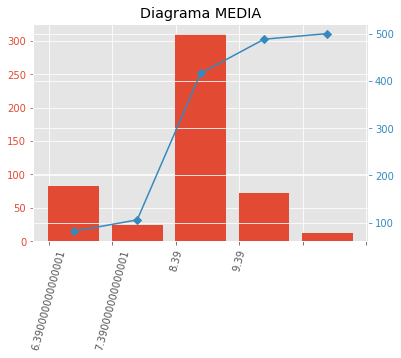

In [44]:
from matplotlib.ticker import PercentFormatter
# Utilizo un diagrama de pareto 

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('Diagrama MEDIA')
ax.bar(df_med['Marca'], df_med['fi'], color='C0')

ax2 = ax.twinx()
ax2.plot(df_med['Marca'], df_med['Fi'], color='C1', marker="D", ms=5)

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

ax.set_xticklabels(df_med['Marca'],rotation=75)

plt.show()

In [45]:
m = sim.size # Numero de datos
k = round(1 + 3.322 * math.log10(m)) # Numero de intervalos
ak = 4 # Intervalos del aca2
vMx = sim.max() # Valor Maximo
vMn = sim.min() # Valor Mimo
inf = sim.min() # Limite inferior del primer intervalo
rang = round(vMx - vMn) # Rango(R)
amp = round(rang / k) # Amplitud
dif = (sim.min() - sim.max()) % k
f = math.ceil(rang / k) # Frecuencia
sup = vMx + f  # Limite superior

In [46]:
# Creo la tabla de frecuencias para la variable 
intervalos_sim = pd.interval_range( start = vMn[0], end = sup[0], freq = f,  name="Intervalo", closed="left")

df_sim = pd.DataFrame(index=intervalos_sim)
df_sim["LimInf"] = df_sim.index.left
df_sim["LimSup"] = df_sim.index.right
df_sim["Marca"]  = df_sim.index.mid
df_sim["fi"] = pd.cut(sim['SIMPLE'] , bins= df_sim.index).value_counts()

In [47]:
sum(df_sim['fi']) # Valido los datos

500

In [48]:
# Obtengo las frecuencias absolutas acumuladas
# Saco una lista de los valores donde obtengo la FI
Fi = df_sim["fi"].values
#Recorro la lista para ir creando una nueva lista con las sumas
# y obtener la frecuencia absoluta acumulada
a = []
b = 0
for c in Fi:
  b = c + b
  a.append(b)
df_sim["Fi"] = a

In [49]:
df_sim['x.f'] = df_sim['Marca']*df_sim['fi'] # Creo x.f
sum_fi = sum(df_sim['fi']) # Suma total de fi
sum_xf = sum(df_sim['x.f']) # Suma total de x.f
media_ = sum_xf / sum_fi # Media de la variable
df_sim['(x.med'] = df_sim['Marca'] - media_ # Obtengo x.med
df_sim['(x-xmed).fi'] = df_sim['(x.med']* df_sim['fi'] # Obtengo x-med*fi
df_sim['(x-xmed)^2'] = df_sim['(x-xmed).fi']**2 # 

In [50]:
mediana_ = sim['SIMPLE'].median() # Mediana
moda_ = sim['SIMPLE'].mode() # Moda
var_ = sim['SIMPLE'].var() # Varianza
ds_ = sim['SIMPLE'].std() # Desviacion Estandar

In [51]:
medidas_sim = pd.DataFrame()
medidas_sim['Medida'] = None
medidas_sim['Valor'] = None
md = ['Numero de Datos','Valor Maximo','Valor Minimo','Rango','Intervalos', 'Amplitud','Media','Mediana','Moda','Varianza','Desviacion Estandar']
medidas_sim['Medida'] = md
medidas_sim['Valor'] = [m, vMx[0], vMn[0], rang[0], k, amp[0], media_, mediana_, moda_[0], var_, ds_]

In [52]:
# Tabla de frecuencia SIMPLE
df_sim

,LimInf,LimSup,Marca,fi,Fi,x.f,(x.med,(x-xmed).fi,(x-xmed)^2
Intervalo,,,,,,,,,
"[3.877, 5.077)",3.877,5.077,4.477,41,41,183.557,-2.1696,-88.9536,7912.742953
"[5.077, 6.276999999999999)",5.077,6.277,5.677,138,179,783.426,-0.9696,-133.8048,17903.724503
"[6.276999999999999, 7.4769999999999985)",6.277,7.477,6.877,200,379,1375.400,0.2304,46.0800,2123.366400
"[7.4769999999999985, 8.677)",7.477,8.677,8.077,118,497,953.086,1.4304,168.7872,28489.118884
"[8.677, 9.876999999999999)",8.677,9.877,9.277,3,500,27.831,2.6304,7.8912,62.271037


In [53]:
# Medidas SIMPLE
medidas_sim

,Medida,Valor
0,Numero de Datos,500.000000
1,Valor Maximo,8.877000
2,Valor Minimo,3.877000
3,Rango,5.000000
4,Intervalos,10.000000
5,Amplitud,0.000000
6,Media,6.646600
7,Mediana,6.771500
8,Moda,7.630000
9,Varianza,1.076065


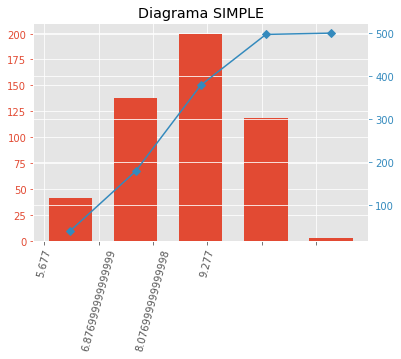

In [54]:
from matplotlib.ticker import PercentFormatter
# Utilizo un diagrama de pareto 

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('Diagrama SIMPLE')
ax.bar(df_sim['Marca'], df_sim['fi'], color='C0')

ax2 = ax.twinx()
ax2.plot(df_sim['Marca'], df_sim['Fi'], color='C1', marker="D", ms=5)

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

ax.set_xticklabels(df_sim['Marca'],rotation=75)

plt.show()



---



<center><h2>Medidas de la muestra<br> Pandas</h2></center>

In [55]:
# Media de la muestra
# Utilizo Pandas
pmedia = lcm1N.mean()

In [56]:
print('Media  Muestra 10% |', '-' ,'|', 'Primaria', pmedia.PRIMARIA, '|', 'Secundaria',pmedia.SECUNDARIA,
      '|', 'Media',pmedia.MEDIA, '|', 'Simple',pmedia.SIMPLE)

Media  Muestra 10% | - | Primaria 6.272119999999999 | Secundaria 6.46168 | Media 7.218 | Simple 6.650604


In [57]:
# Varianza de la muestra
# Utilizo Pandas
pvar = lcm1N.var()

In [58]:
print('Varianza Muestra 10% |', '-', '|', 'Primaria', pvar.PRIMARIA, '|', 'Secundaria', pvar.SECUNDARIA, '|', 'Media', pvar.MEDIA, '|', 'Simple', pvar.SIMPLE)

Varianza Muestra 10% | - | Primaria 1.5904067190380764 | Secundaria 1.8394897571142281 | Media 0.9928505010020039 | Simple 1.0760654701242485


In [59]:
# Desviación estánda de la muestra
# Utilizo Pandas
pstd = lcm1N.std()

In [60]:
print('Desviación estándar Muestra 10% |', '-', '|', 'Primaria', pstd.PRIMARIA, '|', 'Secundaria', pstd.SECUNDARIA, '|', 'Media' ,pstd.MEDIA, '|', 'Simple', pstd.SIMPLE)

Desviación estándar Muestra 10% | - | Primaria 1.2611132855687772 | Secundaria 1.3562779055614775 | Media 0.9964188381408713 | Simple 1.0373357557340095


<center><h2>Graficos</h2></center>
<br>


---


<center>
<p>Dispersión</p>
<p>Histograma</p>
<p>Mapa de Calor</p>
</center>

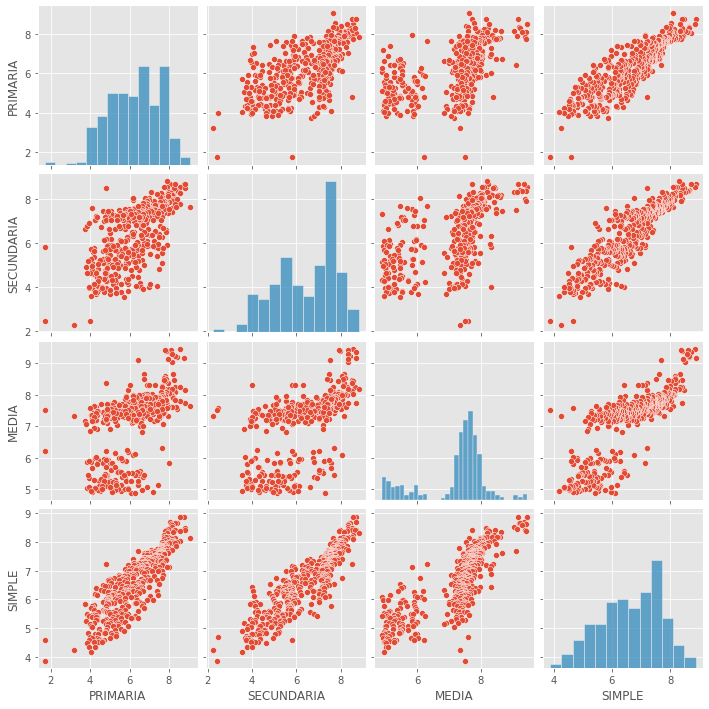

In [61]:
# Utilizo un histograma combinado con dispersión para validar la distribución de las variables 

sns.pairplot(lcm1N)

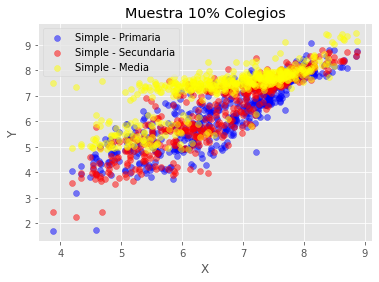

In [62]:
# Creo un diagrama de dispersión para la  muestra y sobrepongo todas las variables
plt.scatter(lcm1N['SIMPLE'],lcm1N['PRIMARIA'], color='blue', label="Simple - Primaria", alpha=0.5)
plt.scatter(lcm1N['SIMPLE'],lcm1N['SECUNDARIA'], color='red', label="Simple - Secundaria", alpha=0.5)
plt.scatter(lcm1N['SIMPLE'],lcm1N['MEDIA'], color='yellow', label="Simple - Media", alpha=0.5)
plt.title('Muestra 10% Colegios')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

El diagrama de dispersión parece indicar una relación lineal positiva

<center><h3>Correlación lineal<br> R</h3></center>


In [63]:
# Metodo Pearson
rPearson1M = lcm1N.corr(method='pearson')

In [64]:
rPearson1M

,PRIMARIA,SECUNDARIA,MEDIA,SIMPLE
PRIMARIA,1.000000,0.675295,0.536687,0.871375
SECUNDARIA,0.675295,1.000000,0.593197,0.899391
MEDIA,0.536687,0.593197,1.000000,0.796188
SIMPLE,0.871375,0.899391,0.796188,1.000000



La relacion siempre sera 1. de la variable con ella misma




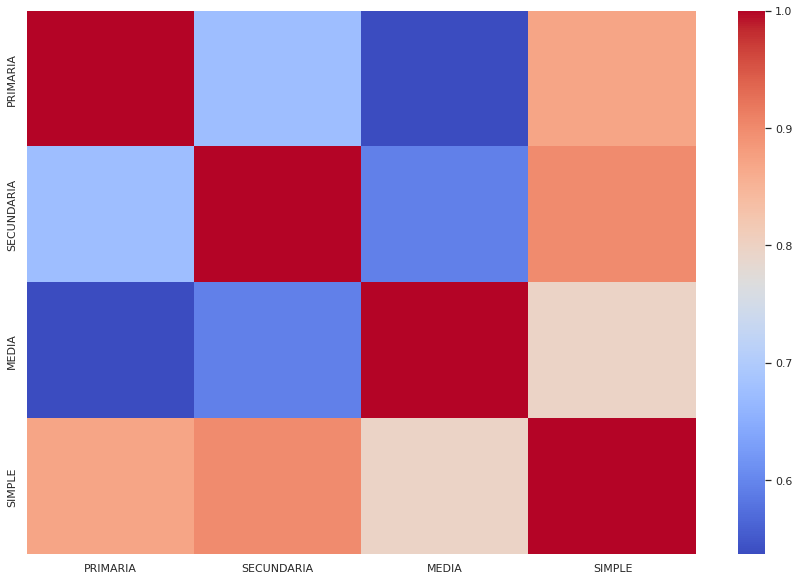

In [65]:
# Mapa de calor de las correlaciones de la muestra del 10% para Colegios
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(
    rPearson1M,
    xticklabels=rPearson1M.columns,
    yticklabels=rPearson1M.columns,
    cmap='coolwarm'
)

<center>Azul = Correlacion Negativa <br> Rojo = Correlacion Positiva</center>


---



<center><h3>Tabla de Coeficiente de Correlación</h3></center>

In [66]:
# Creo un nuevo dataframe para la tabla de Coeficiente de Correlación
dr = pd.DataFrame()
dr['Rango'] = None
dr['Relacion Lineal'] = None

In [67]:
# Genero la tabla de relacion 
rl = ['Perfecta','Fuerte','Significativa','Moderada','Debil','Muy Debil','Nula']
ra = ['0,96 - 1,0', '0,85 - 0,95','0,70 - 0,84','0,50 - 0,69','0,20 - 0,49',
       '0,10 - 0,19','0,09 - 0,0']
dr['Rango'] = ra
dr['Relacion Lineal'] = rl

<center><h2> Tabla para identificar resultados del analísis</h2></center>
<br>
<center><h3>Coeficiente de Correlación <br> R </h3></center>


---


<center><h4>Interpretación</h4></center>
<br>

<p>
El valor del índice de correlación varía en el intervalo [-1,1], indicando el signo el sentido de la relación:
</p>
Si r =1, existe una correlación positiva perfecta. El índice indica una dependencia total entre las dos variables denominada relación directa: cuando una de ellas aumenta, la otra también lo hace en proporción constante.
Si 0 < r < 1  entonces existe una correlación positiva.
Si r = 0 entonces no existe relación lineal pero esto no necesariamente implica que las variables son independientes: pueden existir todavía relaciones no lineales entre las dos variables.
Si  -1 < r < 0 , existe una correlación negativa.
Si r = -1, existe una correlación negativa perfecta. El índice indica una dependencia total entre las dos variables llamada relación opuesta: cuando una de ellas aumenta, la otra cambia su signo en proporción constante.</p><center>

[Fuente](https://es.wikipedia.org/wiki/Coeficiente_de_correlaci%C3%B3n_de_Pearson)



In [68]:
# Genero la tabla
dr

,Rango,Relacion Lineal
0,"0,96 - 1,0",Perfecta
1,"0,85 - 0,95",Fuerte
2,"0,70 - 0,84",Significativa
3,"0,50 - 0,69",Moderada
4,"0,20 - 0,49",Debil
5,"0,10 - 0,19",Muy Debil
6,"0,09 - 0,0",Nula




---



<center><h3>Tomando como base la anterior tabla se puede concluir que la relacion bivariada de la muestra del 10% de Colegios 2018 segun las variables significativas son:</h3></center>



*   Relaciones bivariadas
    *   Simple - Primaria&nbsp; [**Fuerte**]&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Valor&nbsp;&nbsp;[*0.871375*]
    *   Simple - Secundaria&nbsp; [**Fuerte**]&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Valor&nbsp;&nbsp;[*0.899391*]
    *   Simple - Media&nbsp; [**Significativa**]&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Valor&nbsp;&nbsp;[*0.796188*]

